In [1]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr

from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

%matplotlib inline

In [2]:
year = '2015'

In [3]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
tmask = mesh['tmask']
deptht = mesh['gdept_1d'][0]

In [4]:
def surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, twoD=False):
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))
    filename = f'/data/sallen/results/MEOPAR/new201905//SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc'
    dm = xr.open_dataset(filename)

    if twoD:
        mean_field = np.ma.array(dm[tracer][0], mask=1-tmask[0, 0])
    else:
        mean_field = np.ma.array(dm[tracer][0, 0], mask=1-tmask[0, 0])
    colours = axs[0].pcolormesh(mean_field, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].set_title('Hindcast 201905')
    fig.colorbar(colours, ax=axs[0])
    
    filename = f'/data/sallen/results/MEOPAR/202007/try2/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc'
    ds = xr.open_dataset(filename)
        
    if twoD:
        field = np.ma.array(ds[tracer][0], mask=1-tmask[0,0])
    else:
        field = np.ma.array(ds[tracer][0, 0], mask=1-tmask[0,0])
    colours = axs[1].pcolormesh(field, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1].set_title("Asselin")
    fig.colorbar(colours, ax=axs[1])
    
    colours = axs[2].pcolormesh(field-mean_field, cmap=cdiff, vmax=dvmax, vmin=-dvmax)
    axs[2].set_title("New - Old")
    fig.colorbar(colours, ax=axs[2])
    ds.close()
    dm.close()


    for ax in axs:
        viz_tools.set_aspect(ax)

    return fig

In [5]:
def profiles(tracer, file):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    filename = f'/data/sallen/results/MEOPAR/new201905//SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc'
    dm = xr.open_dataset(filename)

    mean_field = np.ma.array(dm[tracer][0], mask=1-tmask[0])
    axs[0].plot(mean_field.mean(axis=1).mean(axis=1), deptht, linewidth=2, label='Old')
    axs[1].plot(np.zeros_like(deptht), deptht, linewidth=2, label='Old')
    
    filename = f'/data/sallen/results/MEOPAR/202007/try2/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc'
    ds = xr.open_dataset(filename)

    field = np.ma.array(ds[tracer][0], mask=1-tmask[0])
    axs[0].plot(field.mean(axis=1).mean(axis=1), deptht, label='New')
    
    axs[1].plot((field-mean_field).mean(axis=1).mean(axis=1), deptht, label='New')
    ds.close()
    dm.close()

    
    axs[0].invert_yaxis()
    axs[0].legend(loc='best')
    
    axs[1].invert_yaxis()
    axs[1].legend(loc='best')
    
    return fig

In [6]:
def thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    filename = f'/data/sallen/results/MEOPAR/new201905//SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc'
    dm = xr.open_dataset(filename)
    mean_field = np.array(dm[tracer][0])
    colours = vis.contour_thalweg(axs[0], mean_field, bathy, mesh,np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), cmap=cmap)
    axs[0].set_title('Hindcast 201905')

    filename = f'/data/sallen/results/MEOPAR/202007/try2/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc'
    ds = xr.open_dataset(filename)
    field = np.array(ds[tracer][0])
    colours = vis.contour_thalweg(axs[1], field, bathy, mesh,np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), cmap=cmap)

    axs[1].set_title('Asselin')
    colours = vis.contour_thalweg(axs[2], field-mean_field, bathy, mesh, np.arange(-dvmax, 1.2*dvmax, dvmax/5), 
                                      cmap=cdiff)
 
    axs[2].set_title('New - Old')
    ds.close()
    dm.close()

    fig.tight_layout()
    return fig

## Temperature

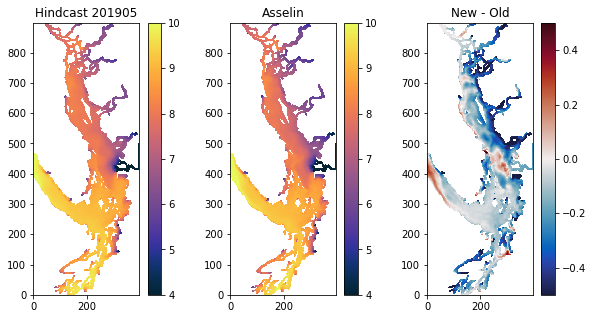

In [7]:
tracer = 'votemper'
file = 'grid'
month = '02'
cmap = cm.thermal
cdiff = cm.balance
vmax = 10
vmin = 4
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

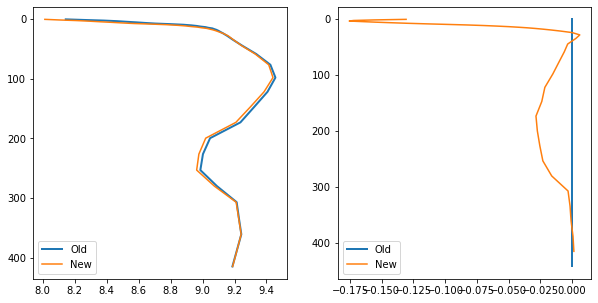

In [8]:
fig = profiles(tracer, file)

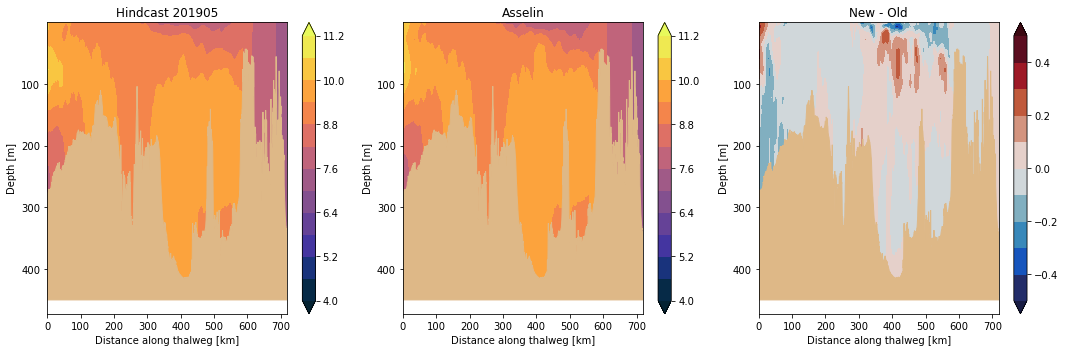

In [9]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## Nitrate

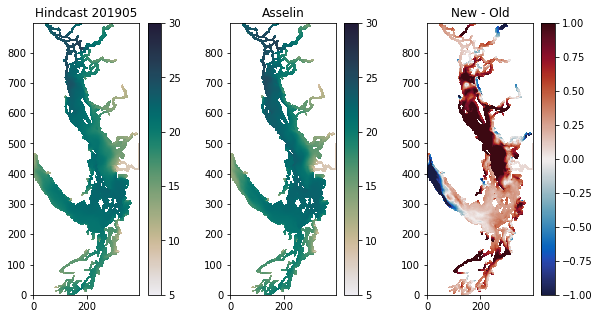

In [10]:
tracer = 'nitrate'
file = 'ptrc'
month = '02'
cmap = cm.rain
cdiff = cm.balance
vmax = 30
vmin = 5
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

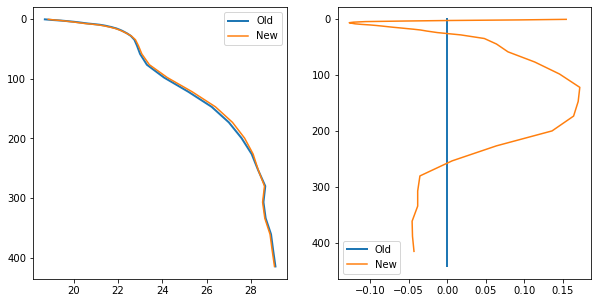

In [11]:
fig = profiles(tracer, file)

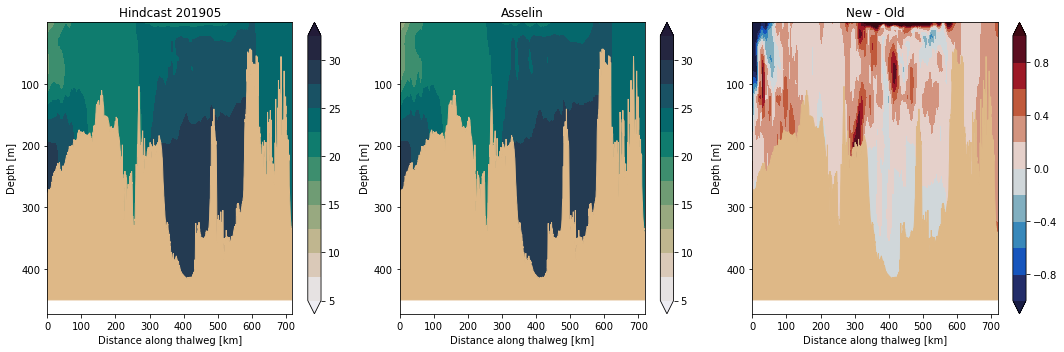

In [12]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## Diatoms

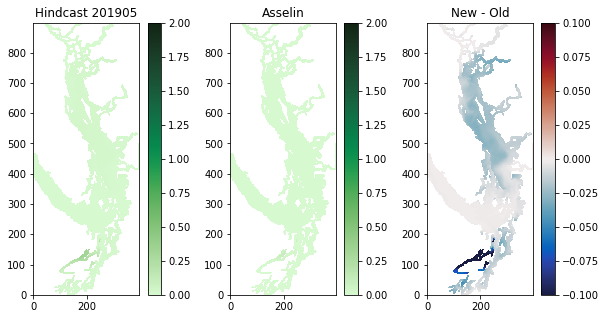

In [13]:
tracer = 'diatoms'
file = 'ptrc'
month = '02'
cmap = cm.algae
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 0.1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

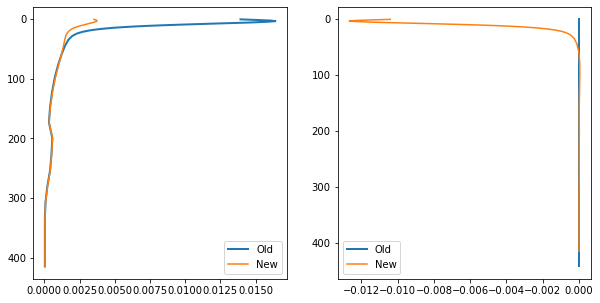

In [14]:
fig = profiles(tracer, file)

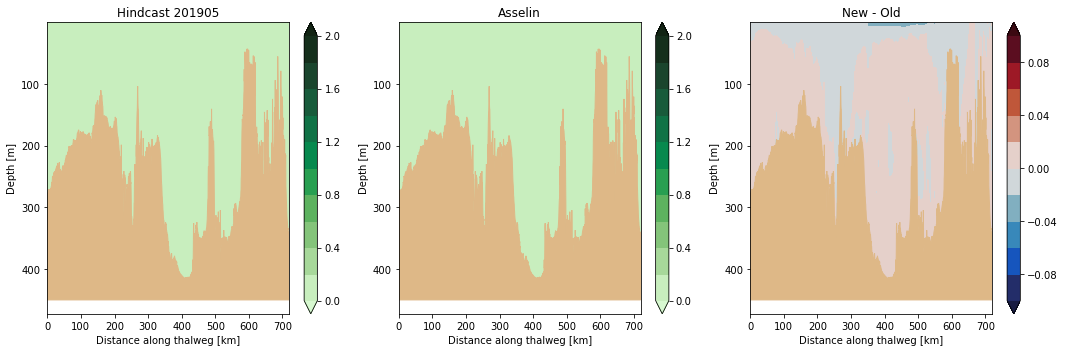

In [15]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## Microzooplankton

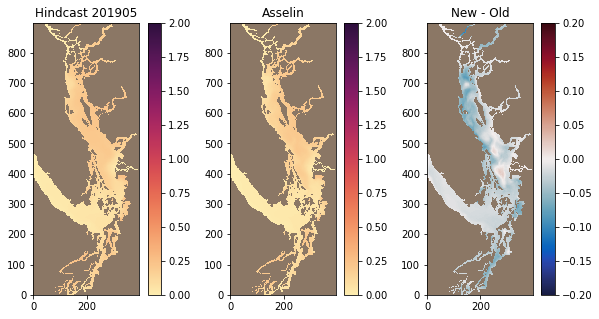

In [16]:
tracer = 'microzooplankton'
file = 'ptrc'
month = '02'
cmap = cm.matter
cmap.set_bad('#8b7765')
cb1 = "Microzooplankton (uM N)"
cdiff = cm.balance
cdiff.set_bad('#8b7765')
cb2 = 'Microzooplankton (uM N)'
vmax = 2
vmin = 0
dvmax = 0.2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

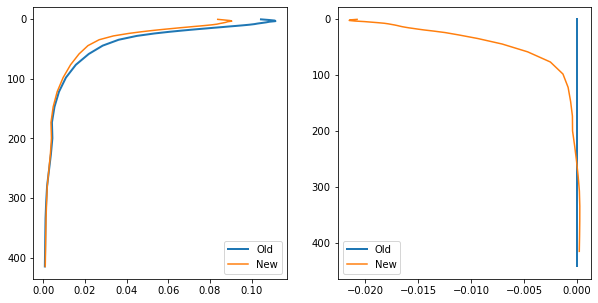

In [17]:
fig = profiles(tracer, file)

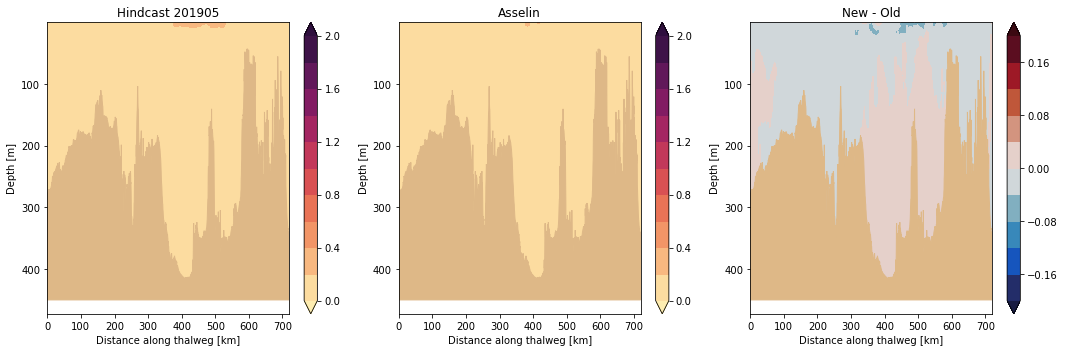

In [18]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## Flagellates

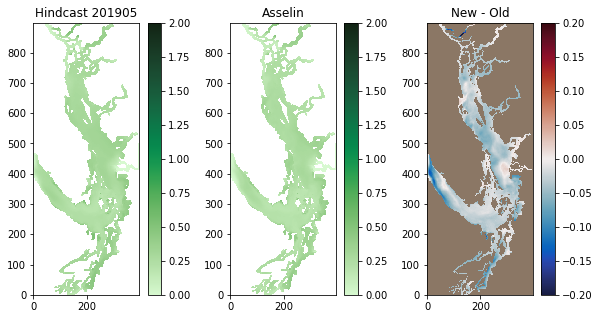

In [19]:
tracer = 'flagellates'
file = 'ptrc'
month = '02'
cmap = cm.algae
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 0.2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

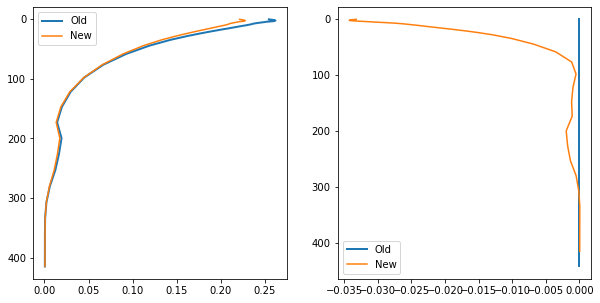

In [20]:
fig = profiles(tracer, file)

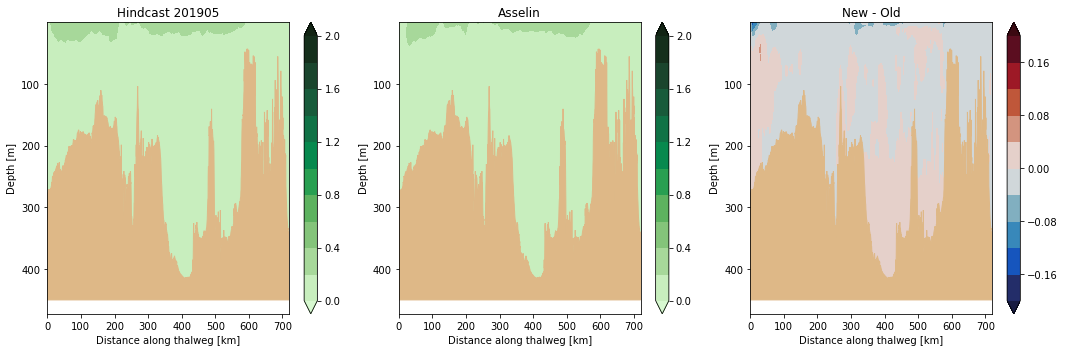

In [21]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## NH4

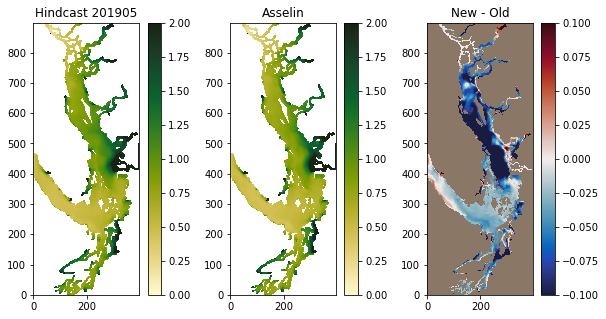

In [22]:
tracer = 'ammonium'
file = 'ptrc'
month = '02'
cmap = cm.speed
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 0.1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

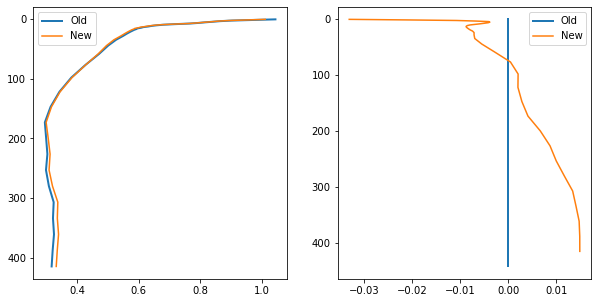

In [23]:
fig = profiles(tracer, file)

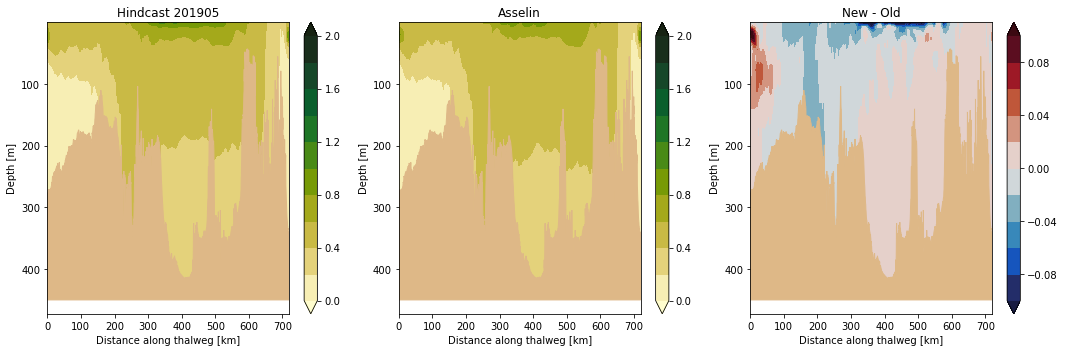

In [24]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## SSH

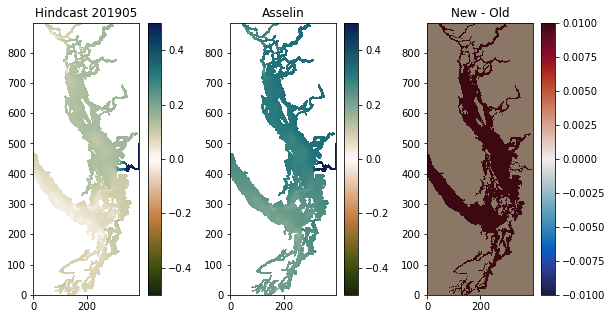

In [25]:
tracer = 'sossheig'
file = 'grid'
month = '02'
cmap = cm.tarn
cdiff = cm.balance
vmax = 0.5
vmin = -0.5
dvmax = 0.01
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, twoD=True)

## PON

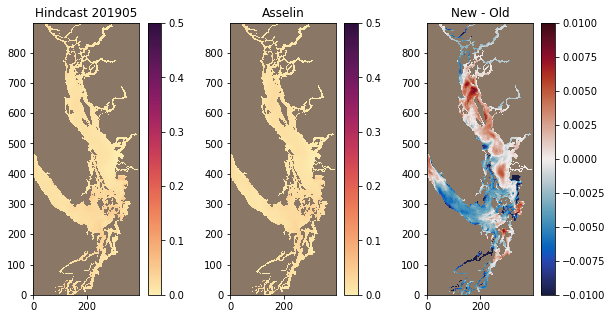

In [26]:
tracer = 'particulate_organic_nitrogen'
file = 'ptrc'
month = '02'
cmap = cm.matter
cdiff = cm.balance
vmax = 0.5
vmin = 0
dvmax = 0.01
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

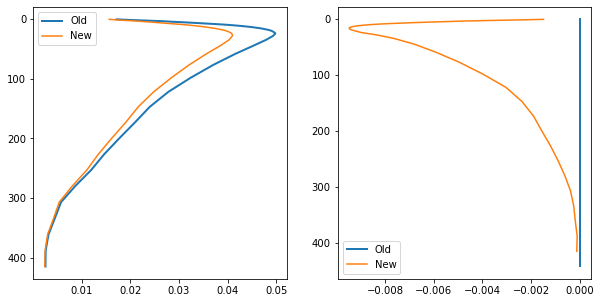

In [27]:
fig = profiles(tracer, file)

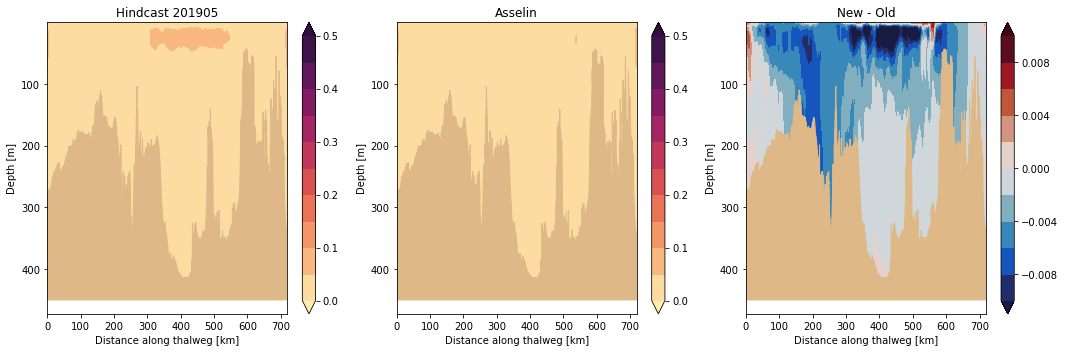

In [28]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## dissolved Silicon

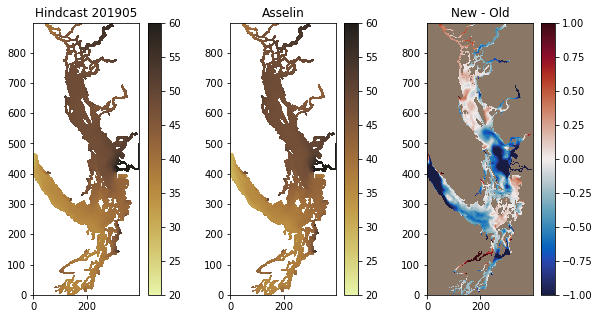

In [29]:
tracer = 'silicon'
file = 'ptrc'
month = '02'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 20
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

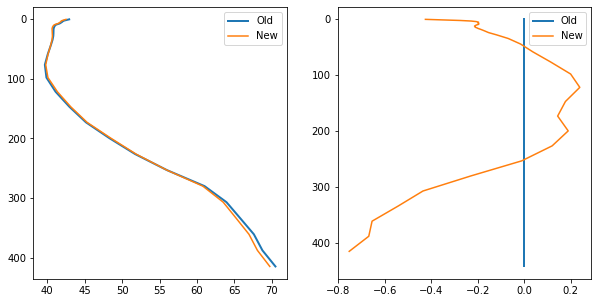

In [30]:
fig = profiles(tracer, file)

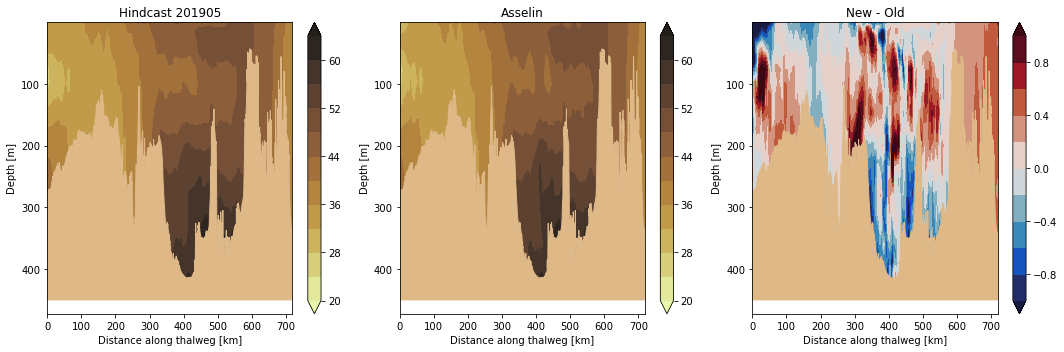

In [31]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## DIC

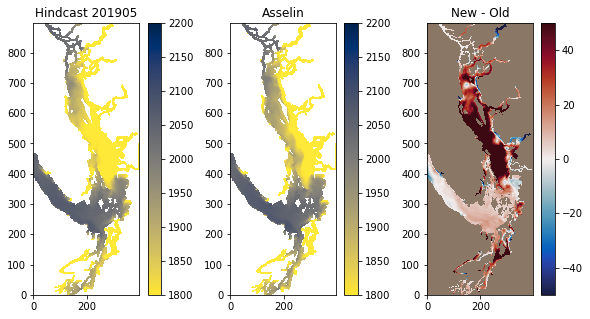

In [32]:
tracer = 'dissolved_inorganic_carbon'
file = 'carp'
month = '02'
cmap = 'cividis_r'
cdiff = cm.balance
vmax = 2200
vmin = 1800
dvmax = 50
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)


In [ ]:
fig = profiles(tracer, file)

In [ ]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## Total Alkalinity

In [ ]:
tracer = 'total_alkalinity'
file = 'carp'
month = '02'
cmap = cm.ice_r
cmap.set_bad('#8b7765')
cdiff = cm.balance
vmax = 2300
vmin = 1900
dvmax = 50
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)


In [ ]:
fig = profiles(tracer, file)

In [ ]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

In [ ]:
0.015/0.8

In [ ]:
0.4/40